In [1]:
# | tags: [parameters]
subject = "101"

In [2]:
from spectral.viz import plot_step, plot_bad_channels, plot_epochs
import pandas as pd
import mne
import autoreject


from spectral.utils import print_date_time, read_parameters, config_project

mne.viz.set_browser_backend("matplotlib")
# mne.viz.set_browser_backend("qt")
mne.set_config("MNE_BROWSER_THEME", "light")


config = read_parameters()
my_paths = config_project(subject)
project_path = my_paths["project_path"]
figures_path = my_paths["figures_path"]

# Load the Excel file
df = pd.read_excel("ICA TO REMOVE.xlsx")

# Print the DataFrame
df_extracted = df.iloc[:, :2]
df_extracted = df_extracted.rename(
    columns={df_extracted.columns[1]: "ica_bad_components"}
)
display(df_extracted)

Using matplotlib as 2D backend.


ID               ica_bad_components
0   101            0 1 2 4 8 11 12 14 15
1   102                0 2 4 6 7 9 12 16
2   103           0 1 2 3 4 6 9 14 18 19
3   104             0 1 4 5 6 9 10 12 31
4   105               0 1 4 6 8 13 23 30
5   106  0 1 2 4 5 6 7 12 14 15 21 30 32
6   107            0 4 5 6 9 10 12 16 23
7   108                      0 2 9 12 25
8   109                0 1 2 3 5 8 10 23
9   110                 1 2 3 6 15 20 31
10  111                    0 2 5 8 11 13
11  112                      0 1 2 5 14 
12  113     0 2 5 8 10 11 13 16 18 27 31
13  114                0 1 3 4 6 7 11 27
14  115                           0 1 12
15  116                  0 7 8 13 14 15 
16  118                0 1 3 10 13 14 15
17  119                       0 1 5 8 17
18  120              3 10 12 13 15 16 17
19  122                     1 3 4 7 9 25
20  123                           0 7 9 
21  124                    0 3 5 6  8 10
22  125           0 2 5 6 7 10 11 12 13 
23  126       0 4 5 6 7 8 9 12 15 19 23 
24  127            0 6 11 13 14 15 18 21
25  128                       0 1 4 9 11
26  129              0 2 4 7 10 14 17 21
27  131         0 1 2 7 8 12 38 46 48 49
28  132                  0 1 5 6 8 9 14 
29  134             0 2  7 8 18 25 27 30
30  135      0 1 2 4 6 7  11 12 15 24 30
31  136       0 1 6 8 10 13 23 35 37 39 
32  137                            0 2 3
33  138                 0 4 5 9 10 12 26
34  139           0 1 2 5 6 7 8 23 24 30
35  140                 1 3 4 5 6 7 8 12
36  142                    0 1 2 3 4 15 
37  143               0 5 12 13 18 22 24
38  144              0 1 2 4 7 8 9 12 49
39  145        0 1 3 6 13 14 23 18 19 20
40  146          0 1 4 5 6 7 11 12 24 30
41  147                   1 2 3 10 12 49
42  148                         0 1 8 28
43  149              0 1 2 9 11 16 19 20
44  150                   0 1 8 11 12 34
45  151               0 1 2 4 7 28 33 36
46  152                  0 6 7 15 21 30

In [3]:
# Iterate over the DataFrame
for index, row in df_extracted.iterrows():
    # Display the 'ID' and 'ica_bad_components' values
    subject = row["ID"]
    ica_bad_components = row["ica_bad_components"].split()
    ica_bad_components = [int(component) for component in ica_bad_components]

    print(f"ID: {subject}, ICA Bad Components: {ica_bad_components}")

ID: 101, ICA Bad Components: [0, 1, 2, 4, 8, 11, 12, 14, 15]
ID: 102, ICA Bad Components: [0, 2, 4, 6, 7, 9, 12, 16]
ID: 103, ICA Bad Components: [0, 1, 2, 3, 4, 6, 9, 14, 18, 19]
ID: 104, ICA Bad Components: [0, 1, 4, 5, 6, 9, 10, 12, 31]
ID: 105, ICA Bad Components: [0, 1, 4, 6, 8, 13, 23, 30]
ID: 106, ICA Bad Components: [0, 1, 2, 4, 5, 6, 7, 12, 14, 15, 21, 30, 32]
ID: 107, ICA Bad Components: [0, 4, 5, 6, 9, 10, 12, 16, 23]
ID: 108, ICA Bad Components: [0, 2, 9, 12, 25]
ID: 109, ICA Bad Components: [0, 1, 2, 3, 5, 8, 10, 23]
ID: 110, ICA Bad Components: [1, 2, 3, 6, 15, 20, 31]
ID: 111, ICA Bad Components: [0, 2, 5, 8, 11, 13]
ID: 112, ICA Bad Components: [0, 1, 2, 5, 14]
ID: 113, ICA Bad Components: [0, 2, 5, 8, 10, 11, 13, 16, 18, 27, 31]
ID: 114, ICA Bad Components: [0, 1, 3, 4, 6, 7, 11, 27]
ID: 115, ICA Bad Components: [0, 1, 12]
ID: 116, ICA Bad Components: [0, 7, 8, 13, 14, 15]
ID: 118, ICA Bad Components: [0, 1, 3, 10, 13, 14, 15]
ID: 119, ICA Bad Components: [0, 1, 5, 8, 

Reading /Users/daniel/PhD/Projects/psd-path/analysis/sub-152_good_epochs-epo.fif ...


    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/daniel/PhD/Projects/psd-path/analysis/sub-152_my_ica_model-ica.fif ...
Now restoring ICA solution ...
Ready.
ID: 152, ICA Bad Components: [0, 6, 7, 15, 21, 30]


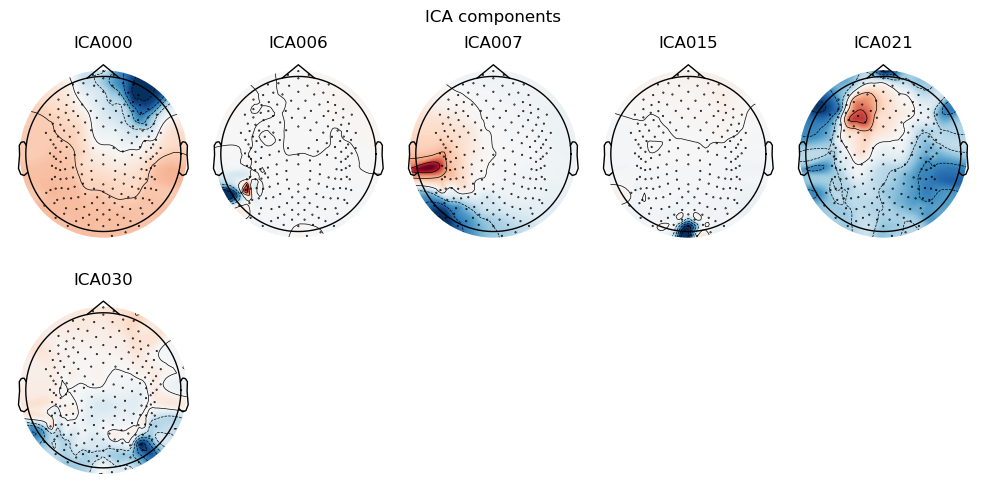

Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


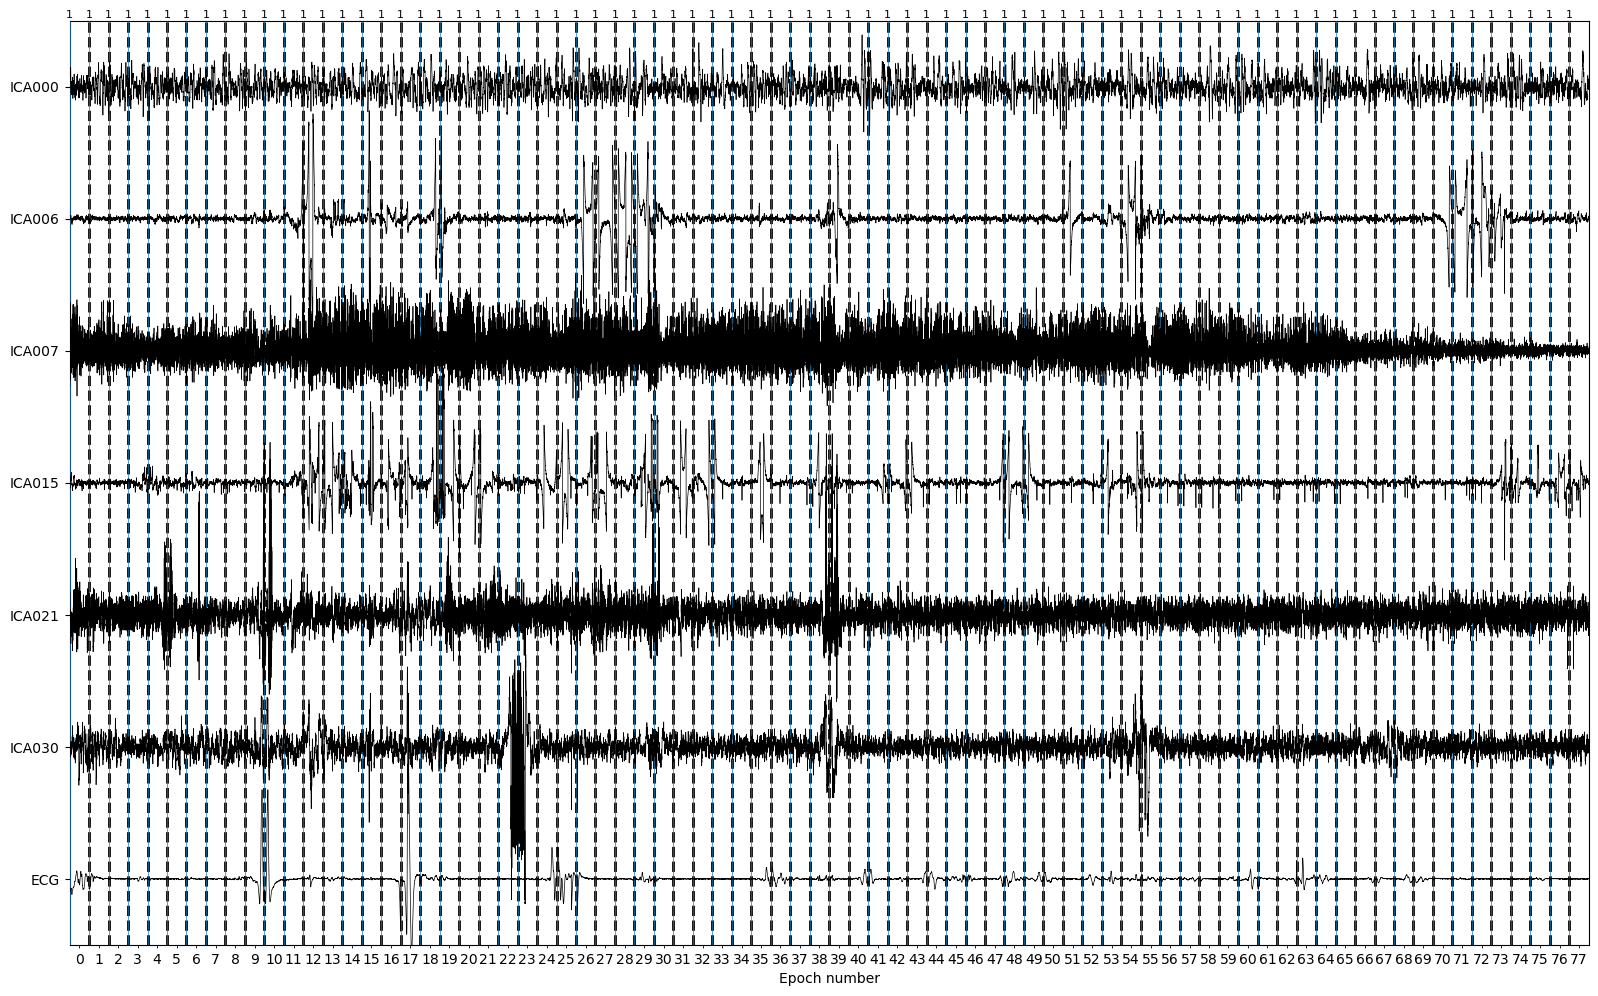

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


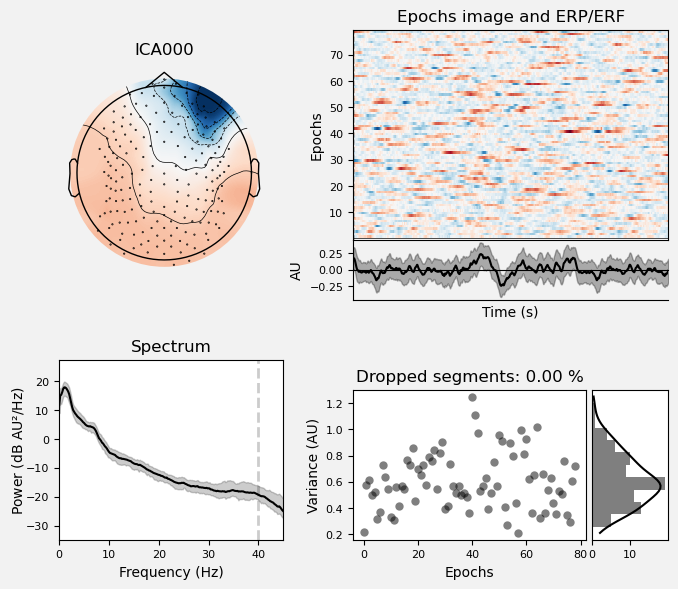

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


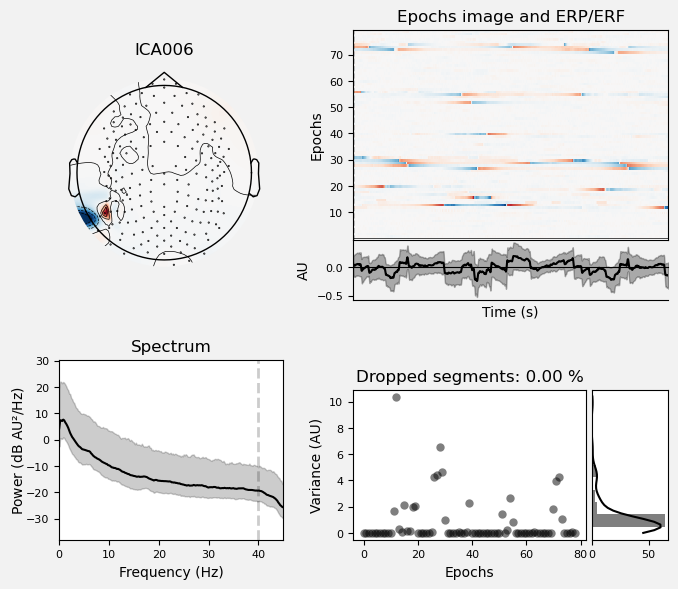

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


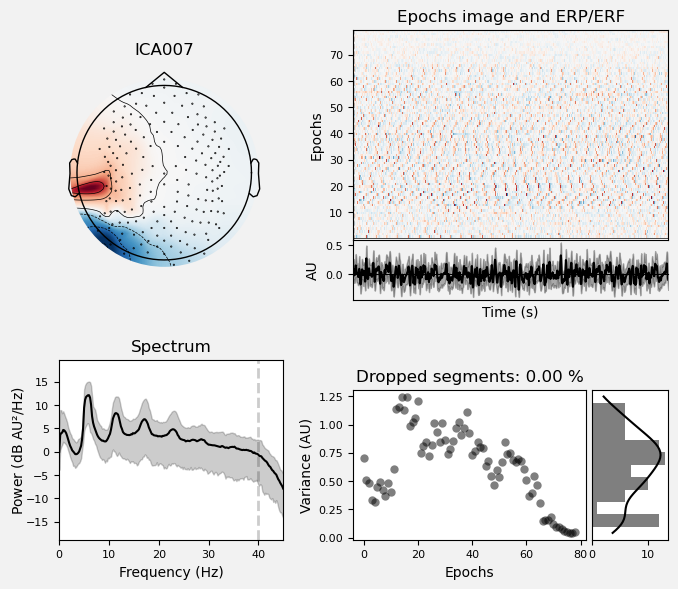

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


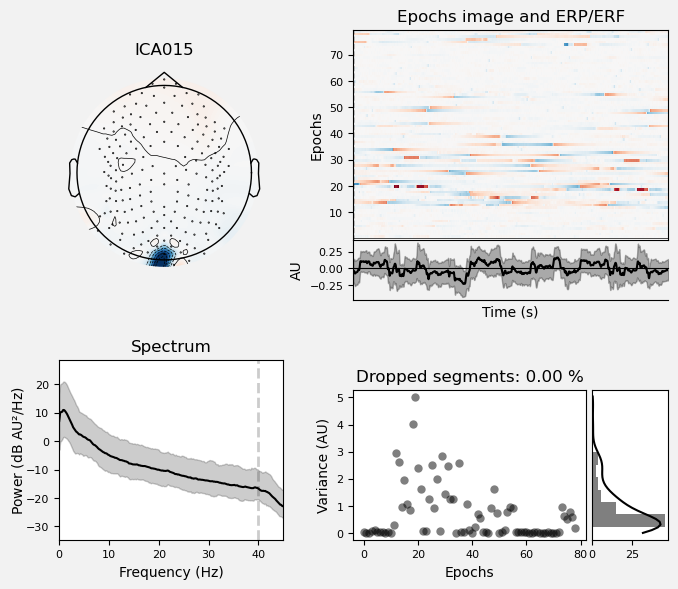

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


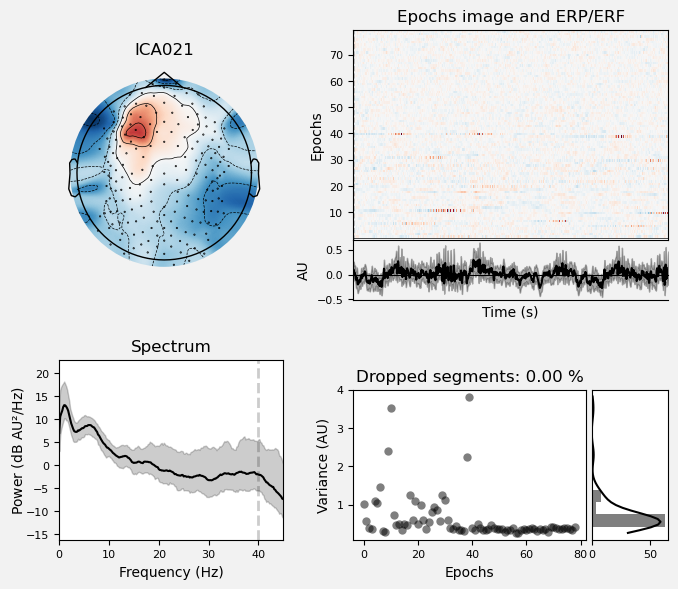

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


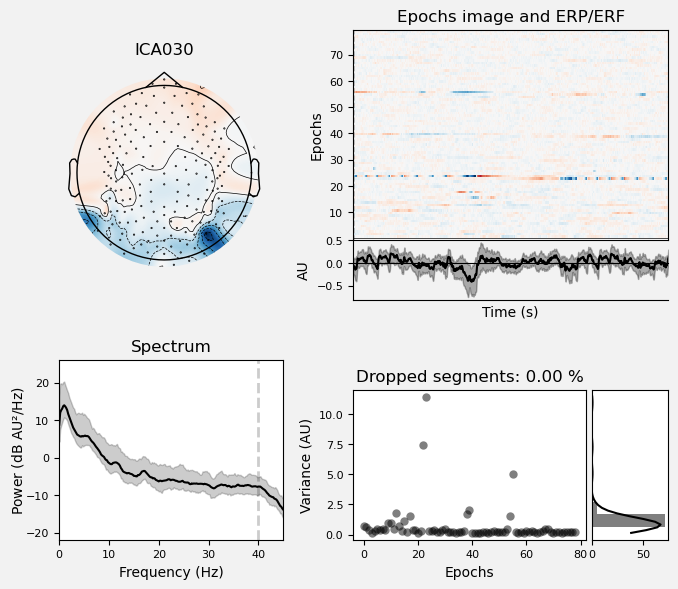

In [4]:
epochs_good = mne.read_epochs(
    f"{project_path}/analysis/sub-{subject}_good_epochs-epo.fif"
)
ica = mne.preprocessing.read_ica(
    f"{project_path}/analysis/sub-{subject}_my_ica_model-ica.fif"
)
ica.exclude = []

print(f"ID: {subject}, ICA Bad Components: {ica_bad_components}")

ica_plot_components = ica.plot_components(picks=ica_bad_components)
ica_plot = ica.plot_sources(
    epochs_good,
    picks=ica_bad_components,
    show_scrollbars=False,
    start=0,
    stop=len(epochs_good) - 1,
)
for component in sorted(ica_bad_components):
    ica_plot = ica.plot_properties(
        epochs_good, picks=component, psd_args={"fmax": 45.0}
    )

ica.exclude = ica_bad_components

Applying ICA to Evoked instance
    Transforming to ICA space (42 components)
    Zeroing out 6 ICA components
    Projecting back using 193 PCA components


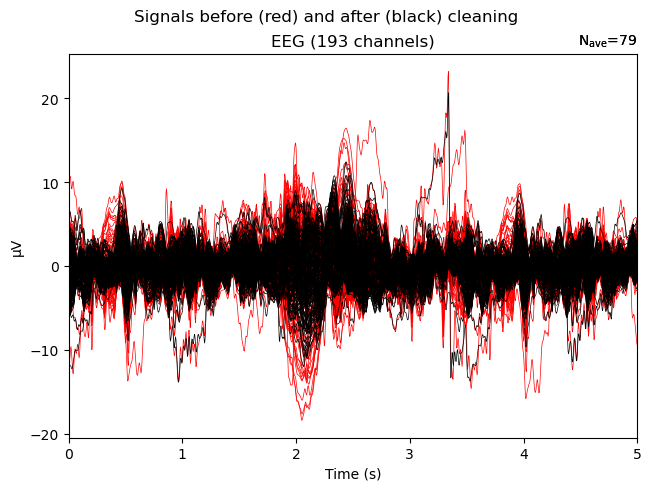

In [49]:
cleaned_plot = ica.plot_overlay(epochs_good.average())

Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


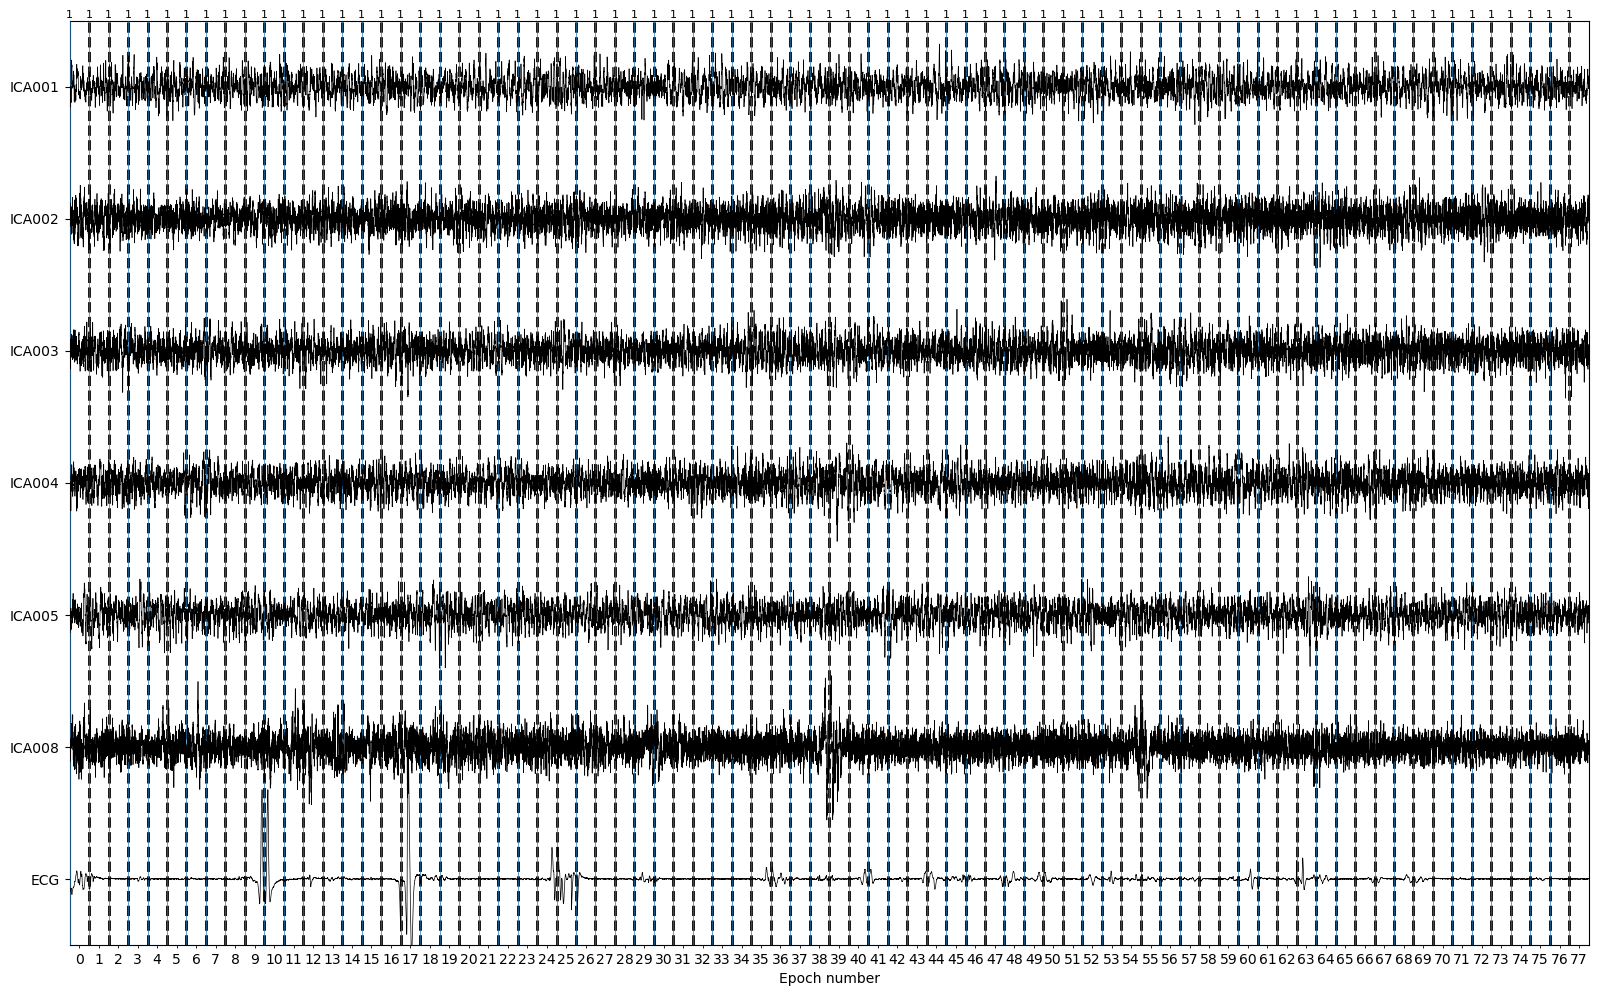

Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


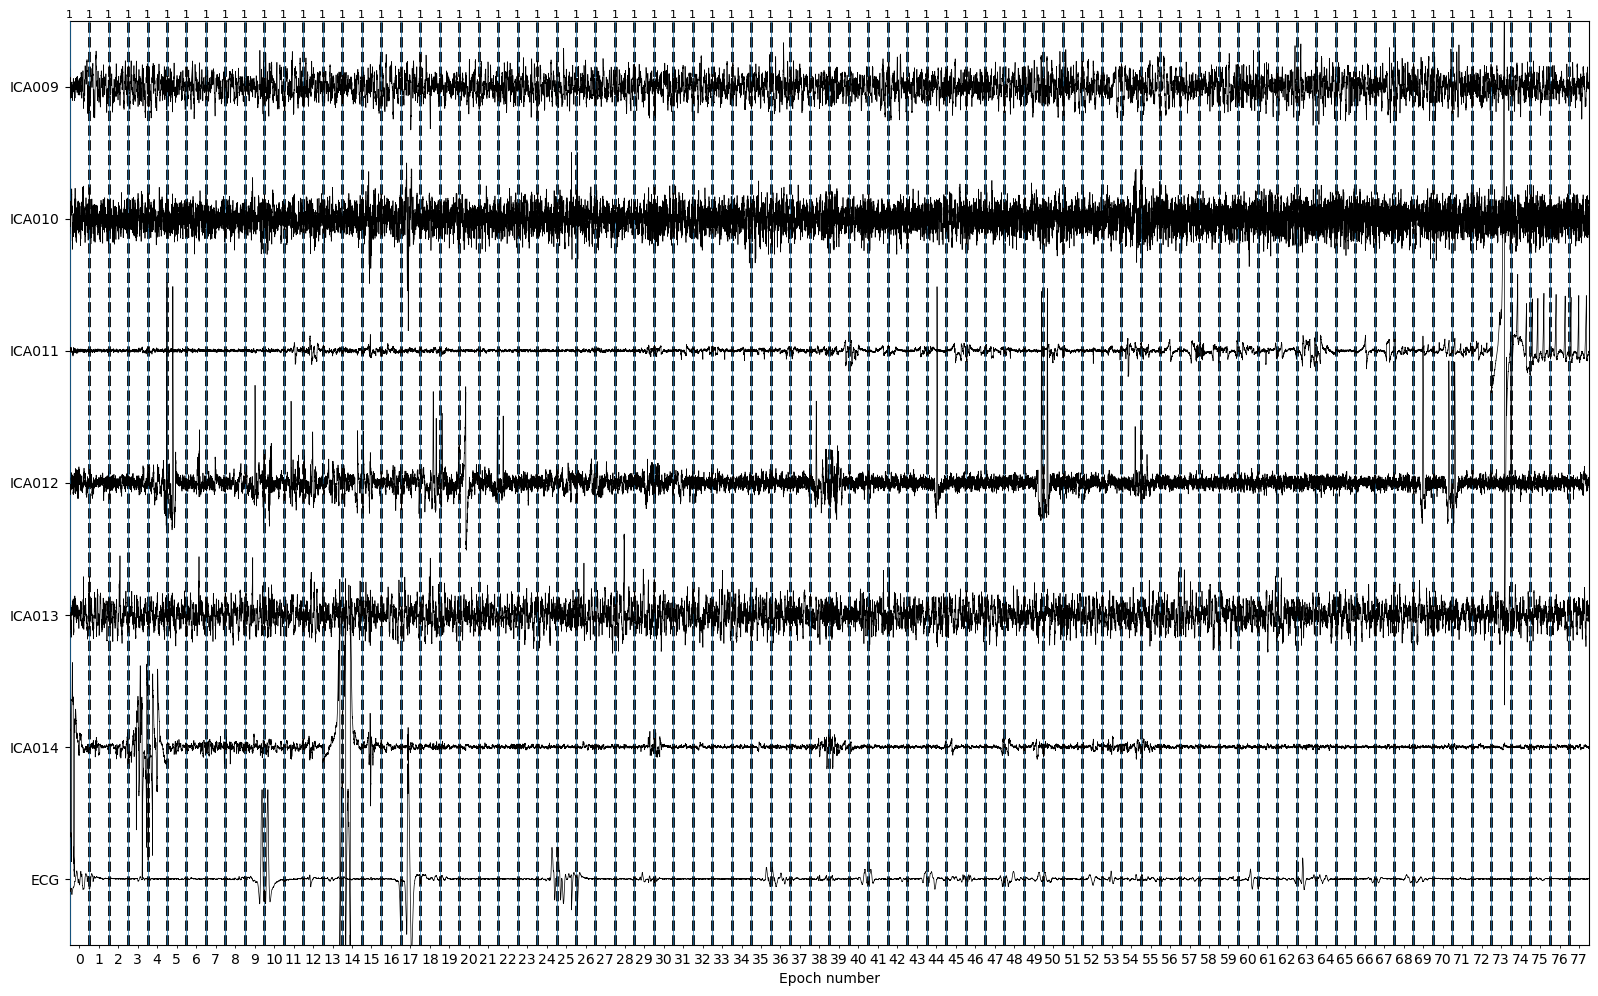

Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


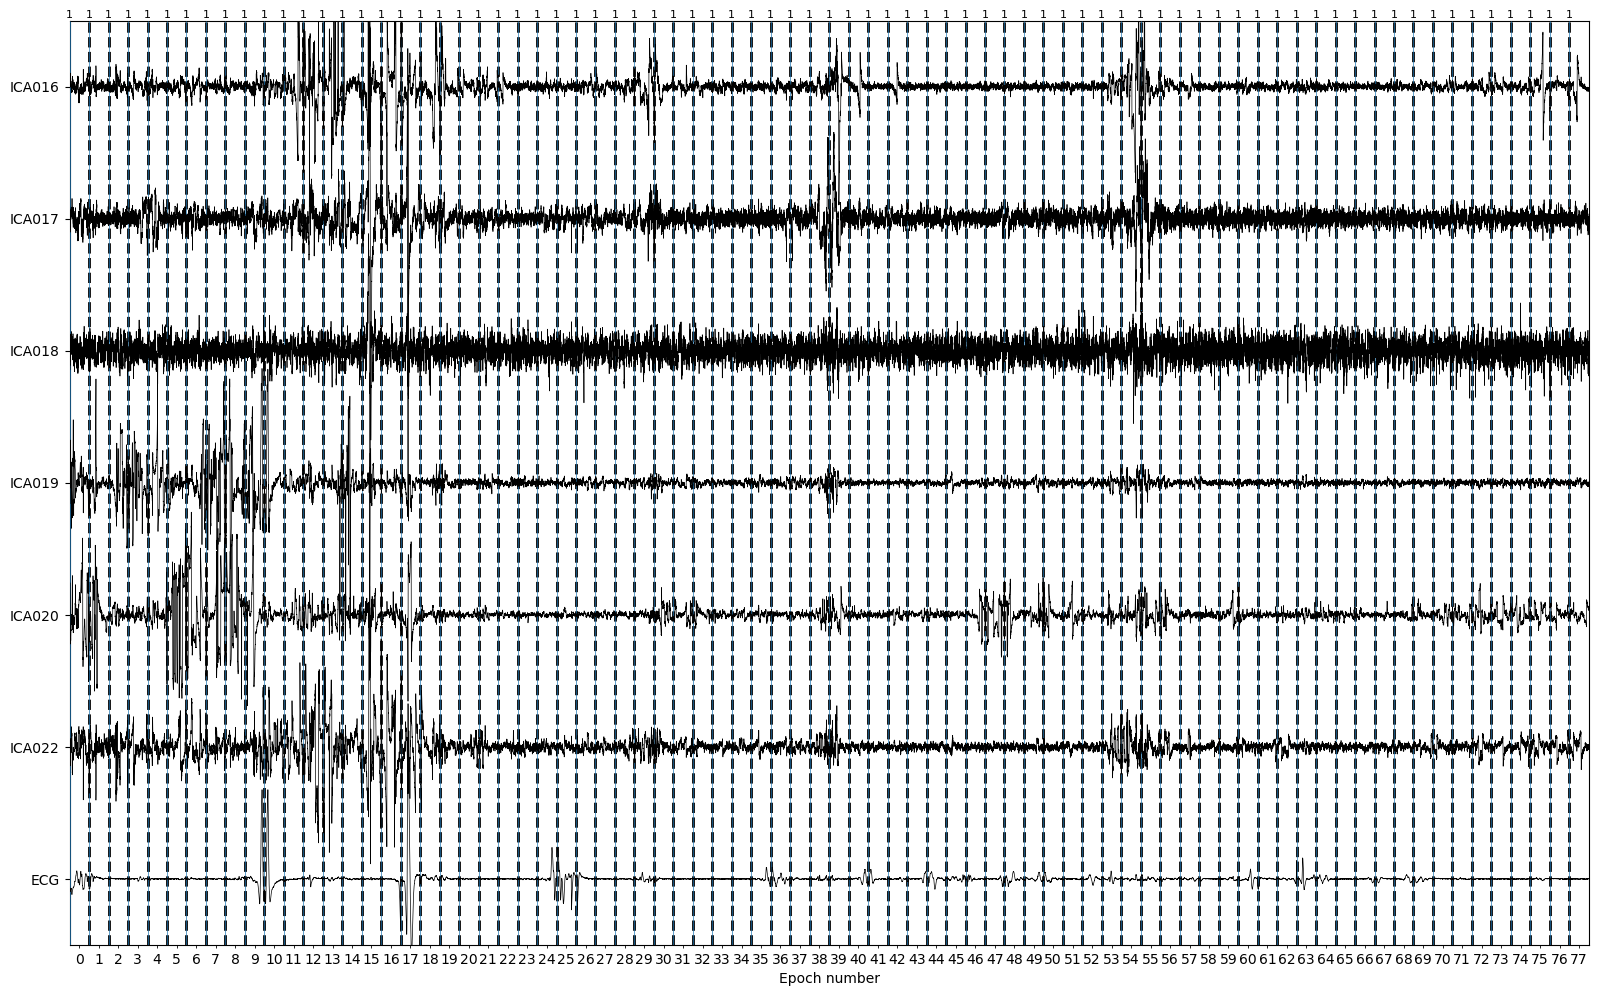

Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


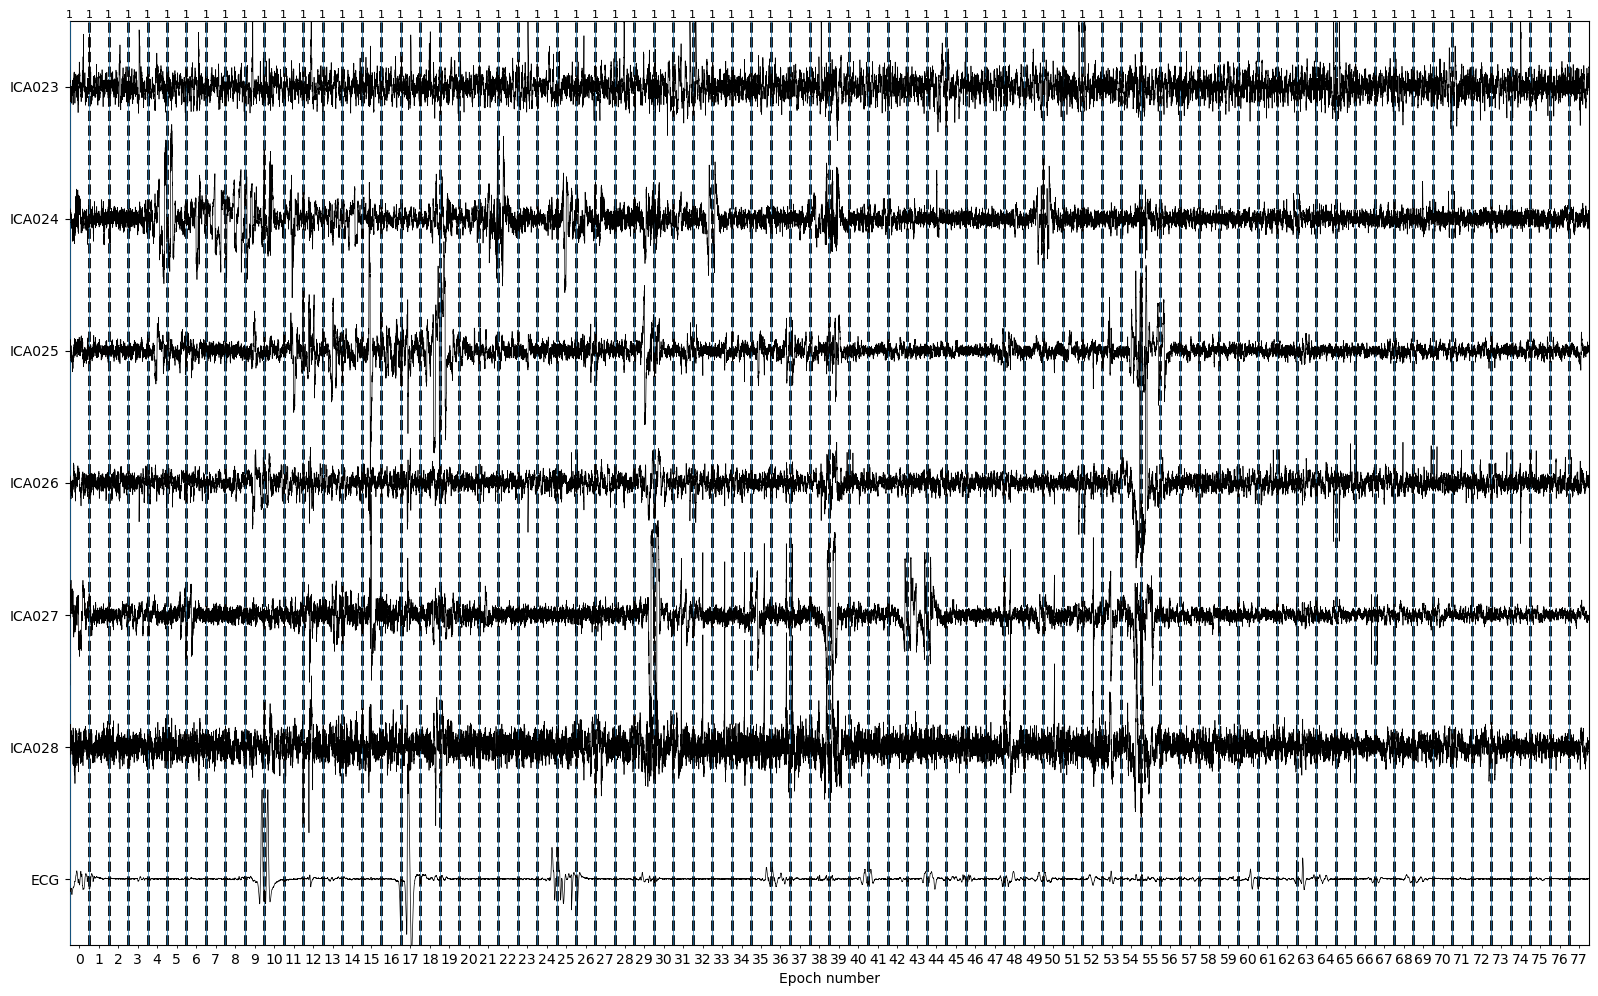

Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


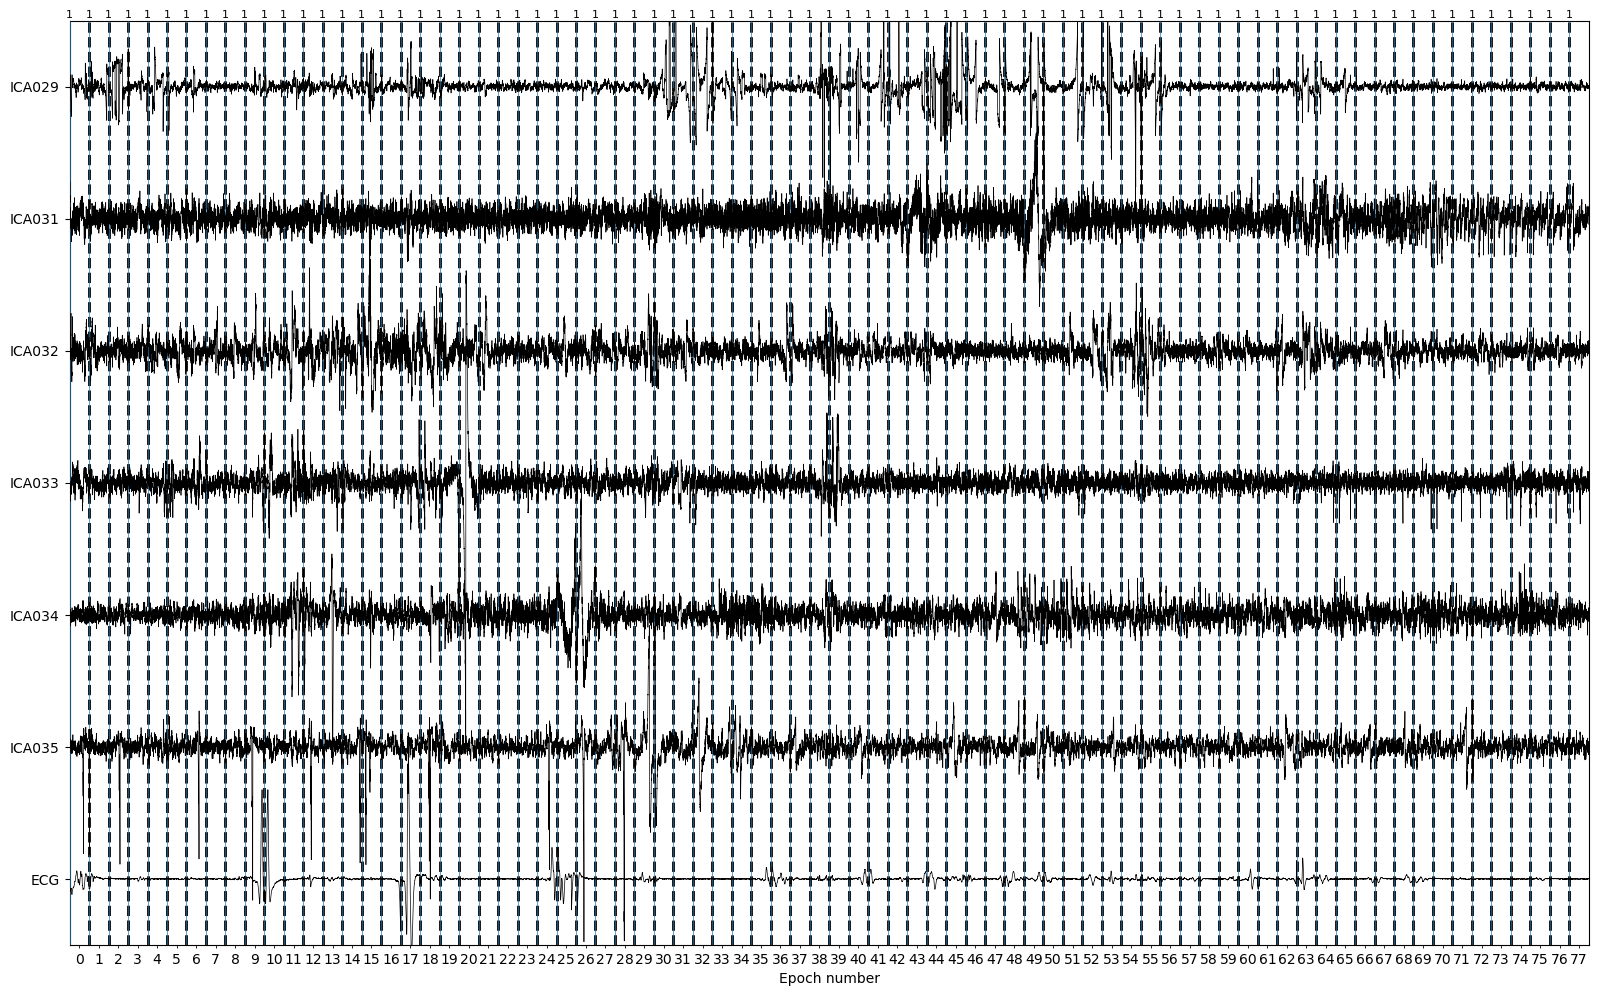

Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


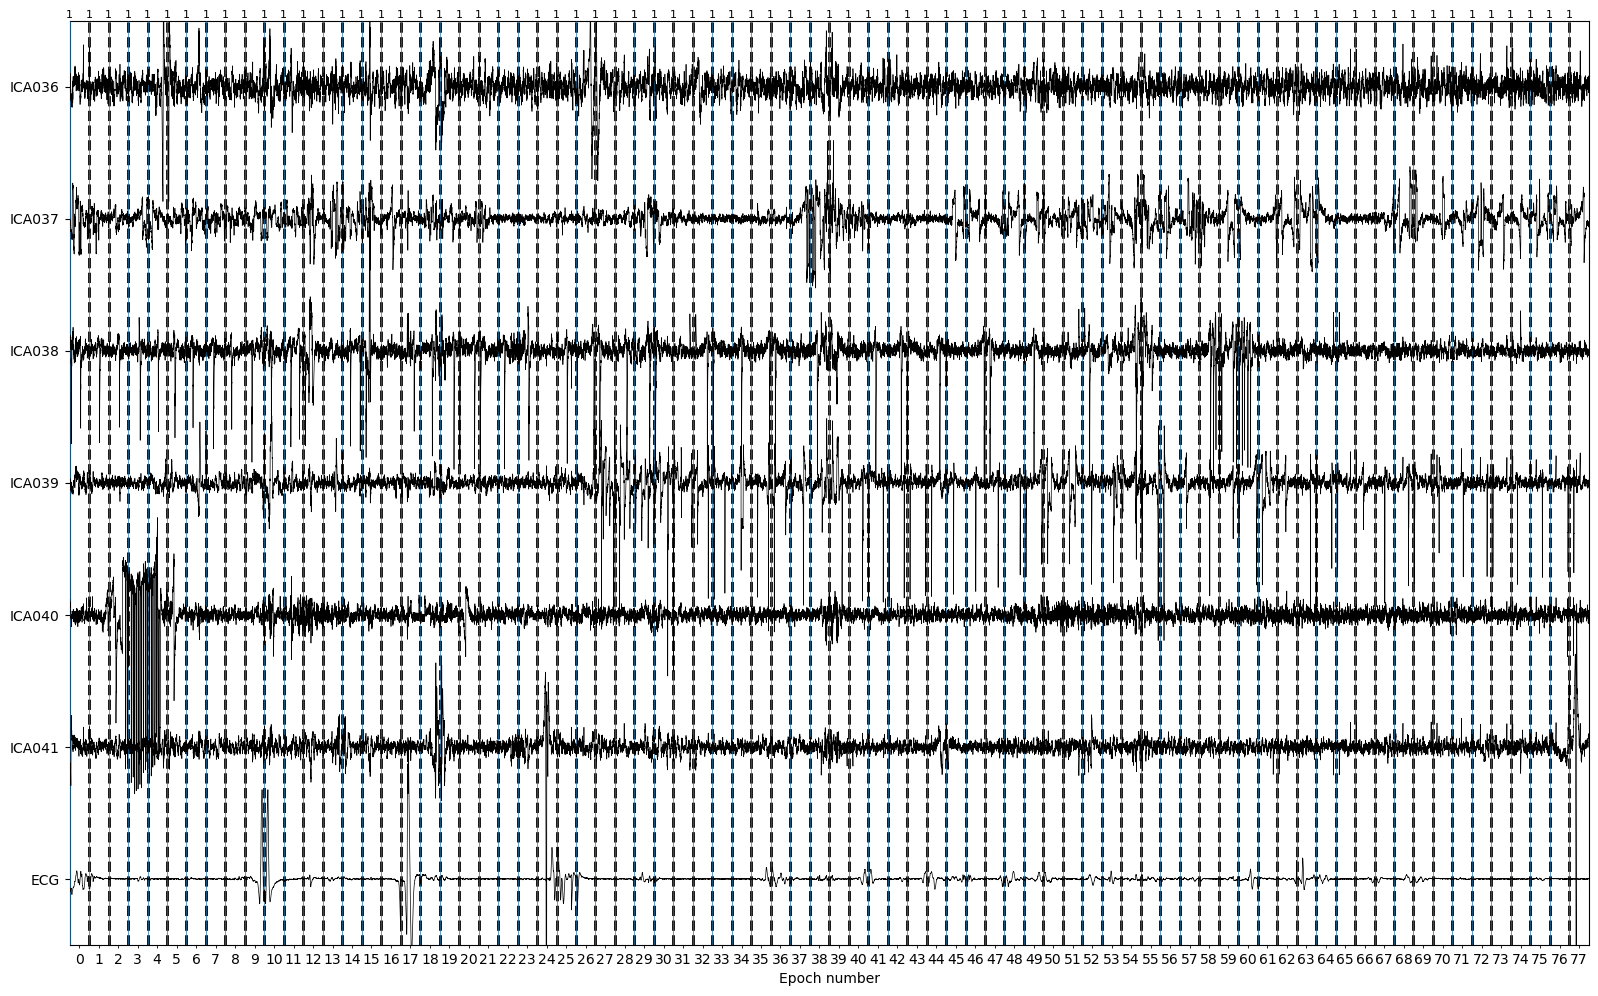

Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


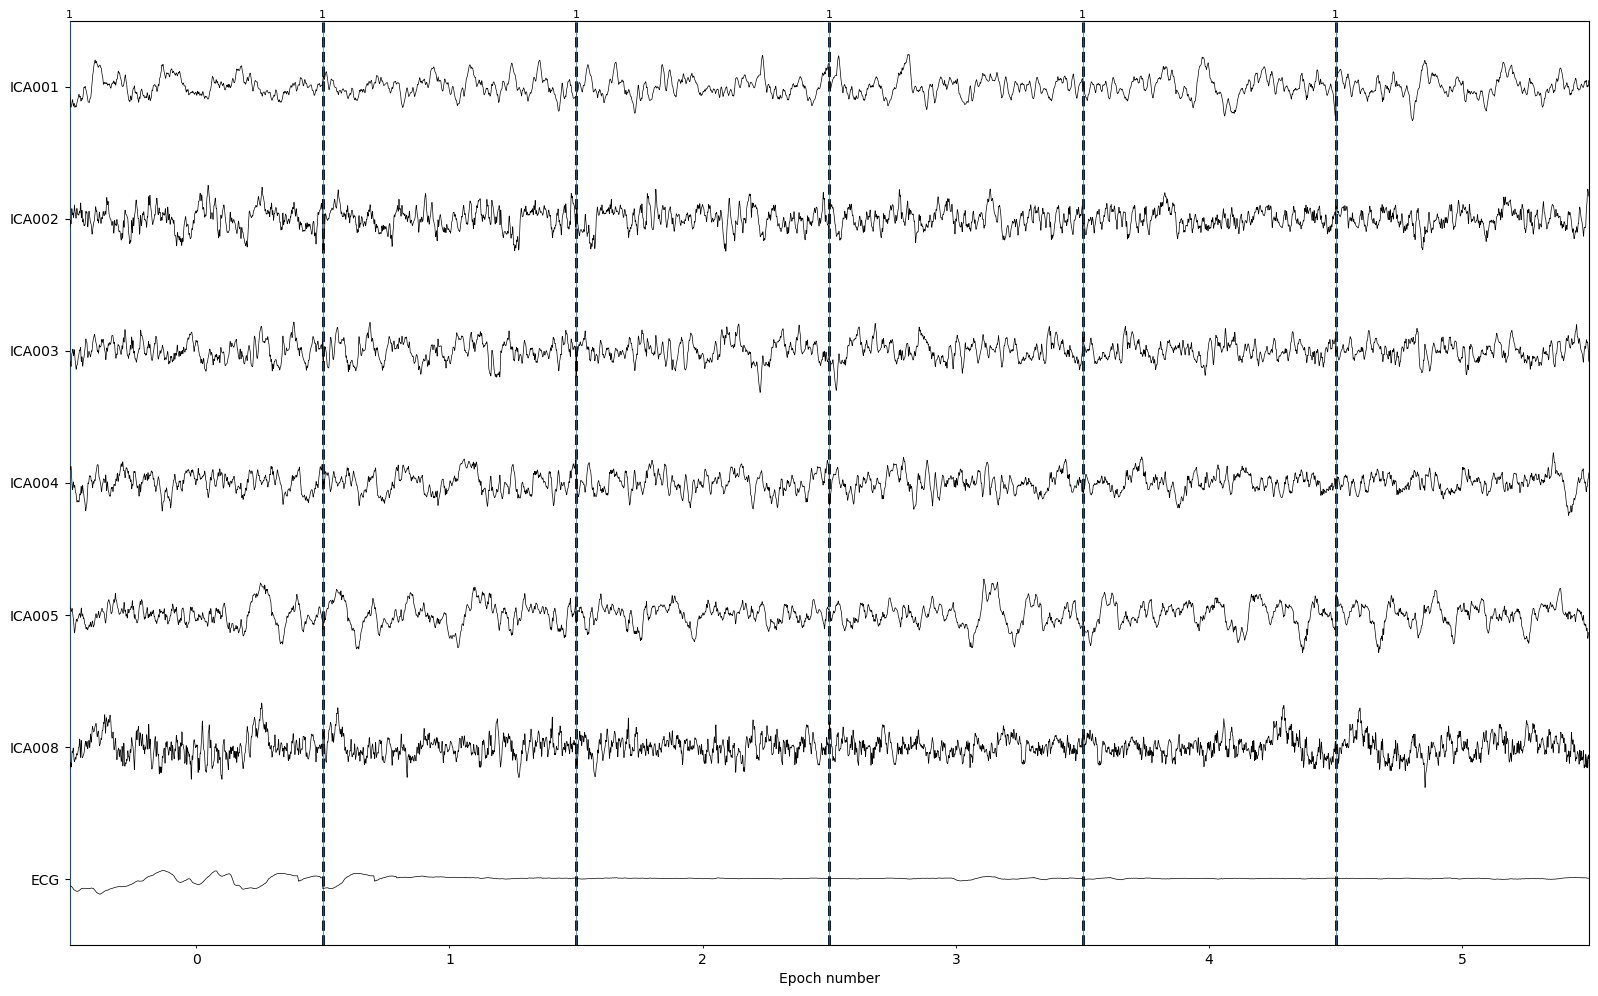

Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


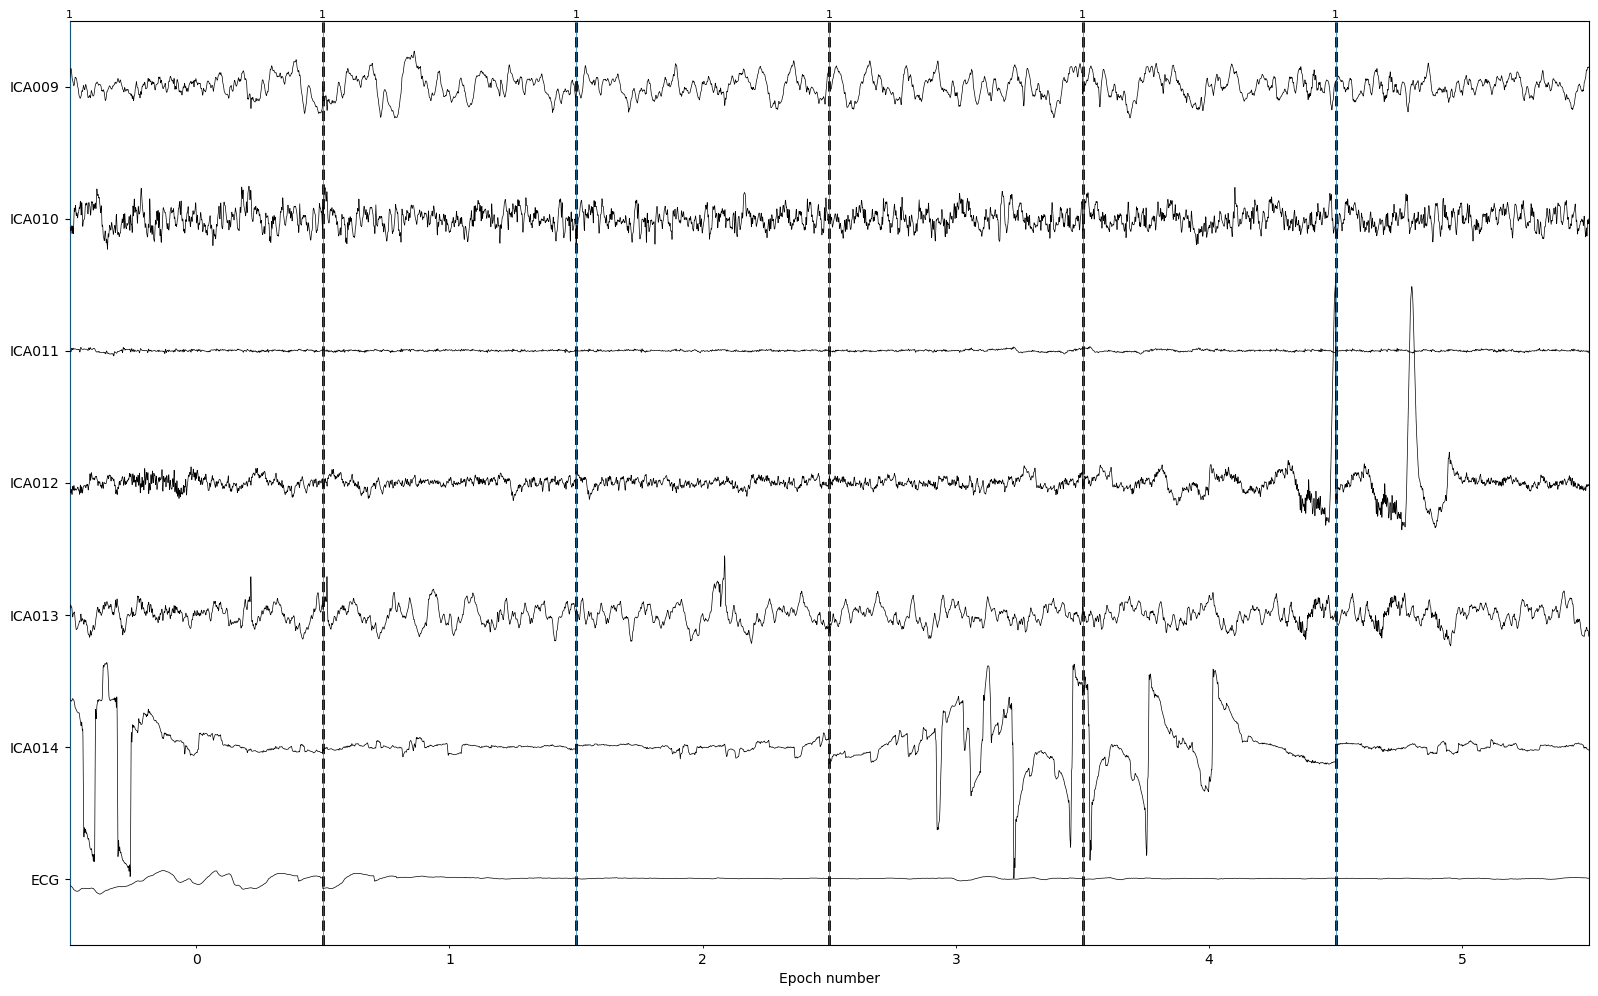

Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


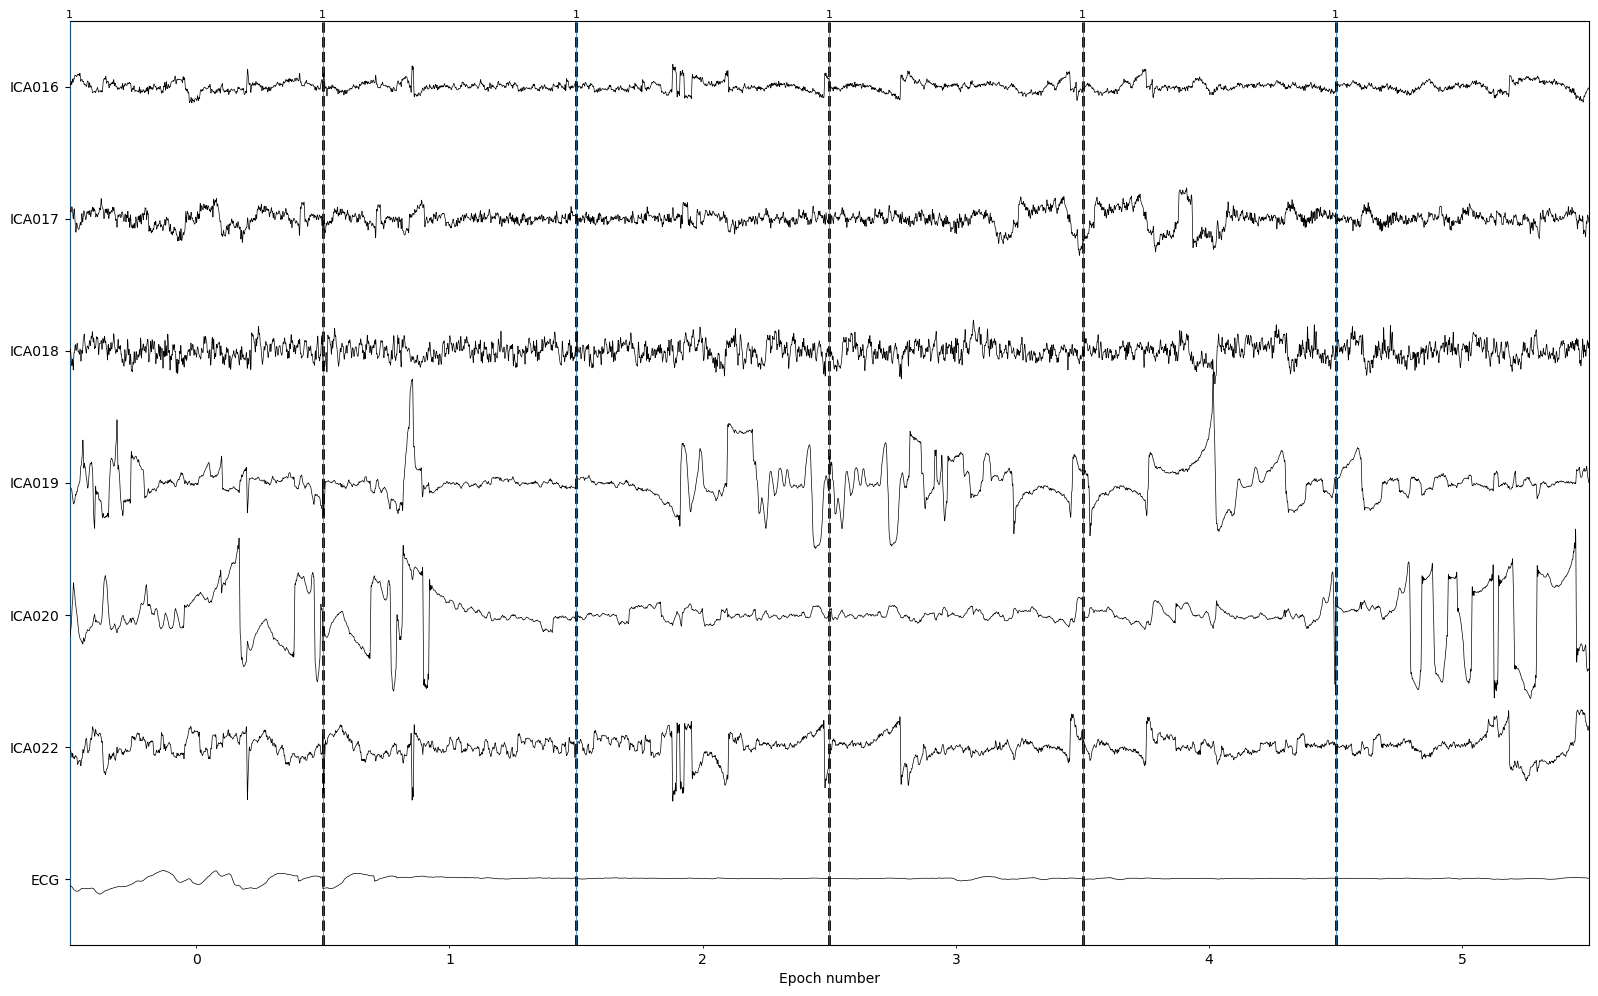

Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


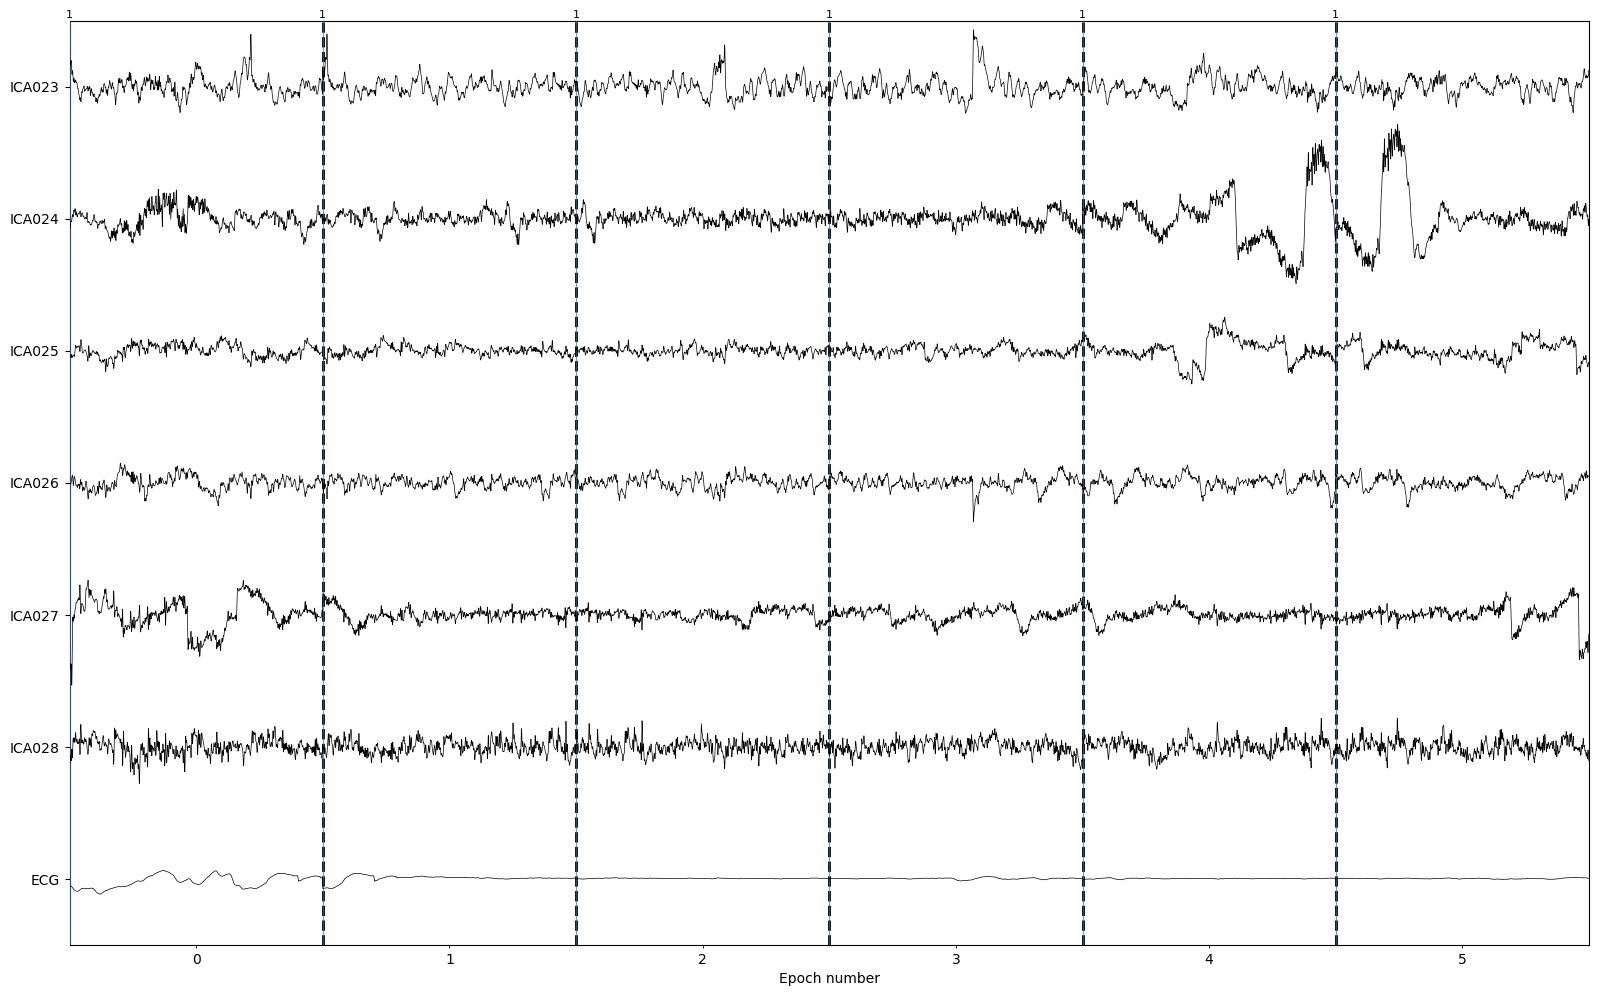

Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


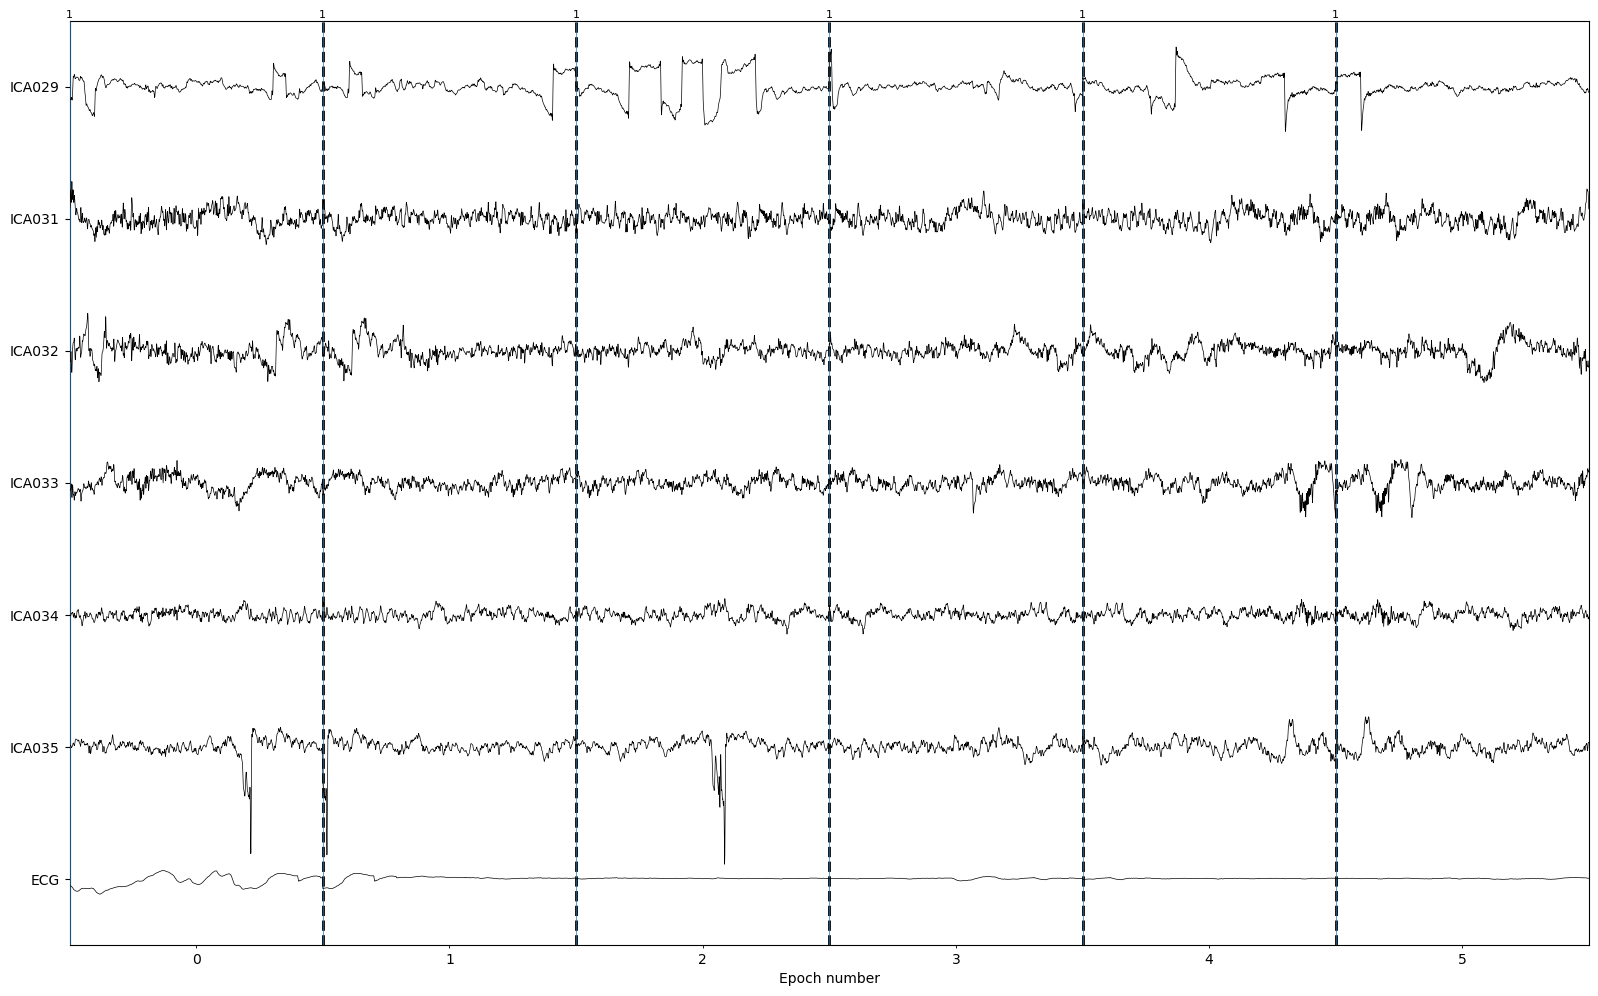

Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


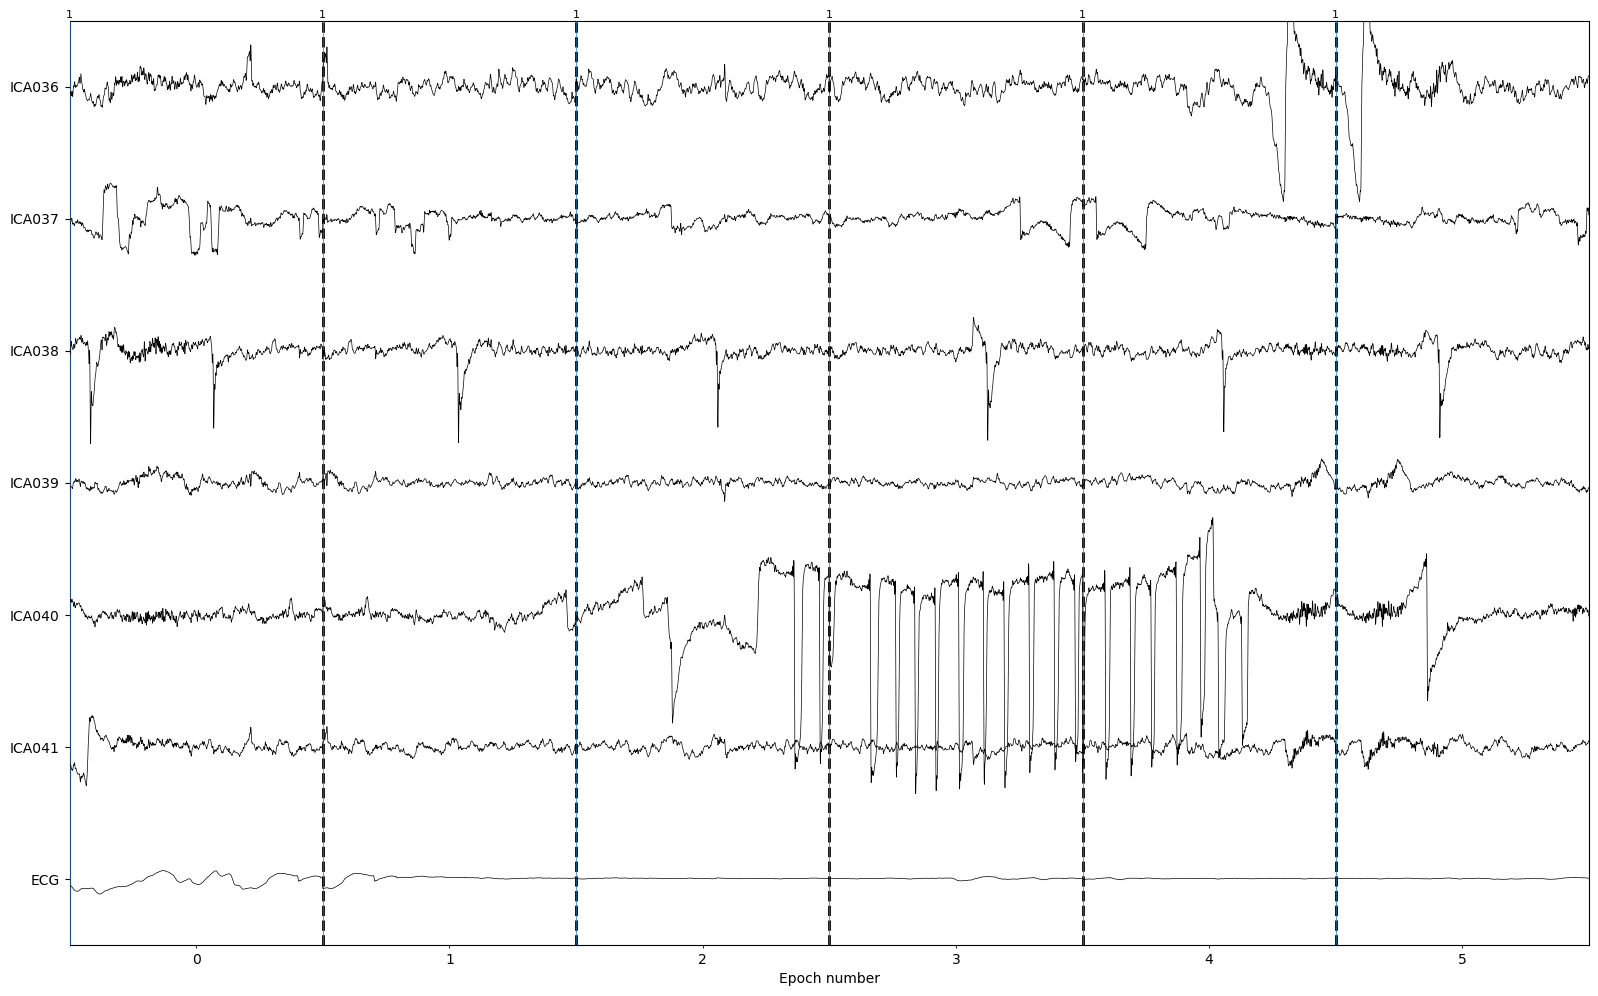

In [5]:
ica_indices = list(range(ica.n_components_))
good_components = [i for i in ica_indices if i not in ica_bad_components]

chunks = [good_components[i: i + 6] for i in range(0, len(good_components), 6)]


for chunk in chunks:
    ica_plot = ica.plot_sources(
        epochs_good,
        picks=chunk,
        show_scrollbars=False,
        start=0,
        stop=len(epochs_good) - 1,
    )
for chunk in chunks:
    ica_plot = ica.plot_sources(
        epochs_good,
        picks=chunk,
        show_scrollbars=False,
        start=0,
        stop=6,
    )

TypeError: axes must be an instance of list, tuple, or ndarray, got <class 'matplotlib.axes._axes.Axes'> instead.

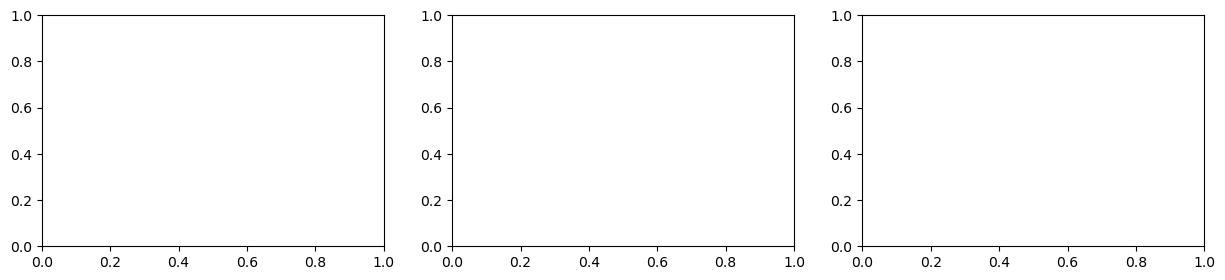

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import io

# Assuming 'ica' is your MNE ICA object and 'epochs' is your Epochs object
figs = []
for i in range(0, len(good_components), 3):
    # Get the current 3 components
    current_components = good_components[i: i + 3]

    # Plot the current 3 components
    fig, axs = plt.subplots(
        1, max(1, len(current_components)), figsize=(15, 3), squeeze=False
    )
    for j, component in enumerate(current_components):
        ica.plot_properties(
            epochs_good, picks=component, axes=axs[0][j], psd_args={
                "fmax": 45.0}
        )

    # Convert the figure to an array and append it to the list
    buf = io.BytesIO()
    plt.savefig(buf, format="png")
    buf.seek(0)
    figs.append(np.array(Image.open(buf)))
    plt.close(fig)

# Now 'figs' is a list of arrays representing the figures

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


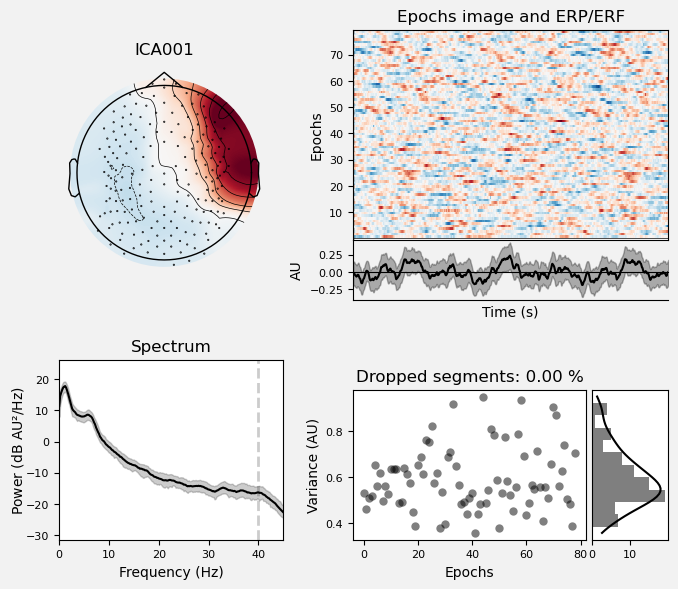

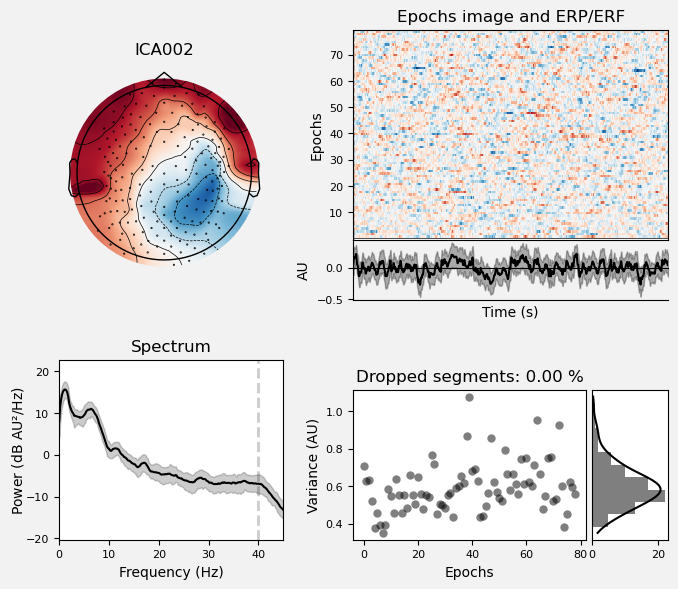

In [8]:
ica_plot = ica.plot_properties(
    epochs_good, picks=good_components[:2], psd_args={"fmax": 45.0}, show=False
);

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


AttributeError: 'list' object has no attribute 'savefig'

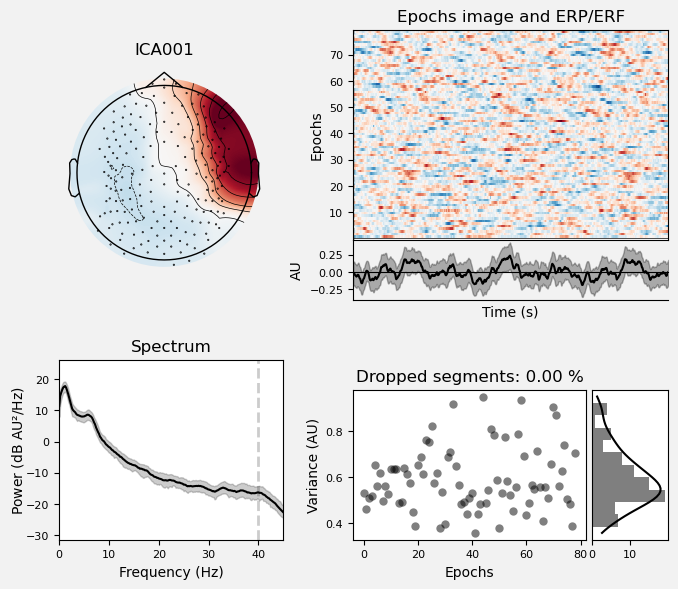

In [ ]:
import io
from PIL import Image

images = []

for component in sorted(good_components[:2]):
    buf = io.BytesIO()

    ica_plot = ica.plot_properties(
        epochs_good, picks=component, psd_args={"fmax": 45.0}, show=False

    ica_plot[0].savefig(buf, format="png")

    plt.close(ica_plot)

    # Reset the position of the BytesIO object to the beginning
    buf.seek(0)

    # Convert the BytesIO object to a PIL Image and append it to the list
    images.append(Image.open(buf))
# Concatenate the images vertically
concatenated_image = Image.concat(images)

# Display the concatenated image
concatenated_image.show()

In [ ]:
ica_plot[1]

[<Figure size 700x600 with 6 Axes>]

Applying ICA to Epochs instance
    Transforming to ICA space (42 components)
    Zeroing out 6 ICA components
    Projecting back using 193 PCA components
<ICA | epochs decomposition, method: picard (fit in 137 iterations on 98829 samples), 42 ICA components (193 PCA components available), channel types: eeg, 6 sources marked for exclusion>
Overwriting existing file.
Overwriting existing file.
No projector specified for this dataset. Please consider the method self.add_proj.


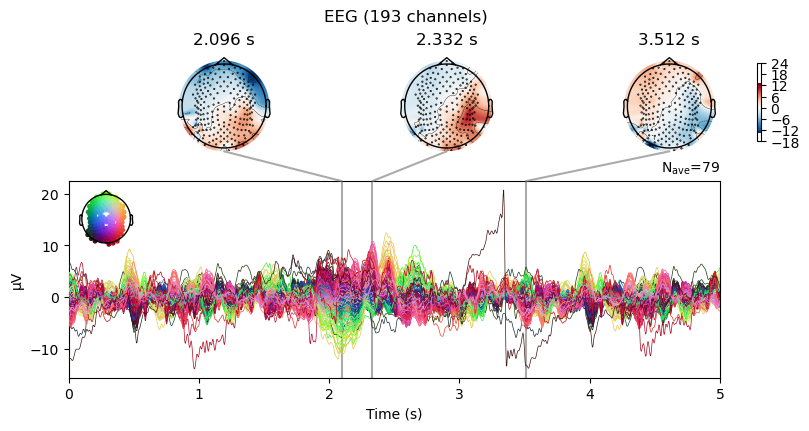

Effective window size : 5.004 (s)
Plotting power spectral density (dB=True).
Averaging across epochs...


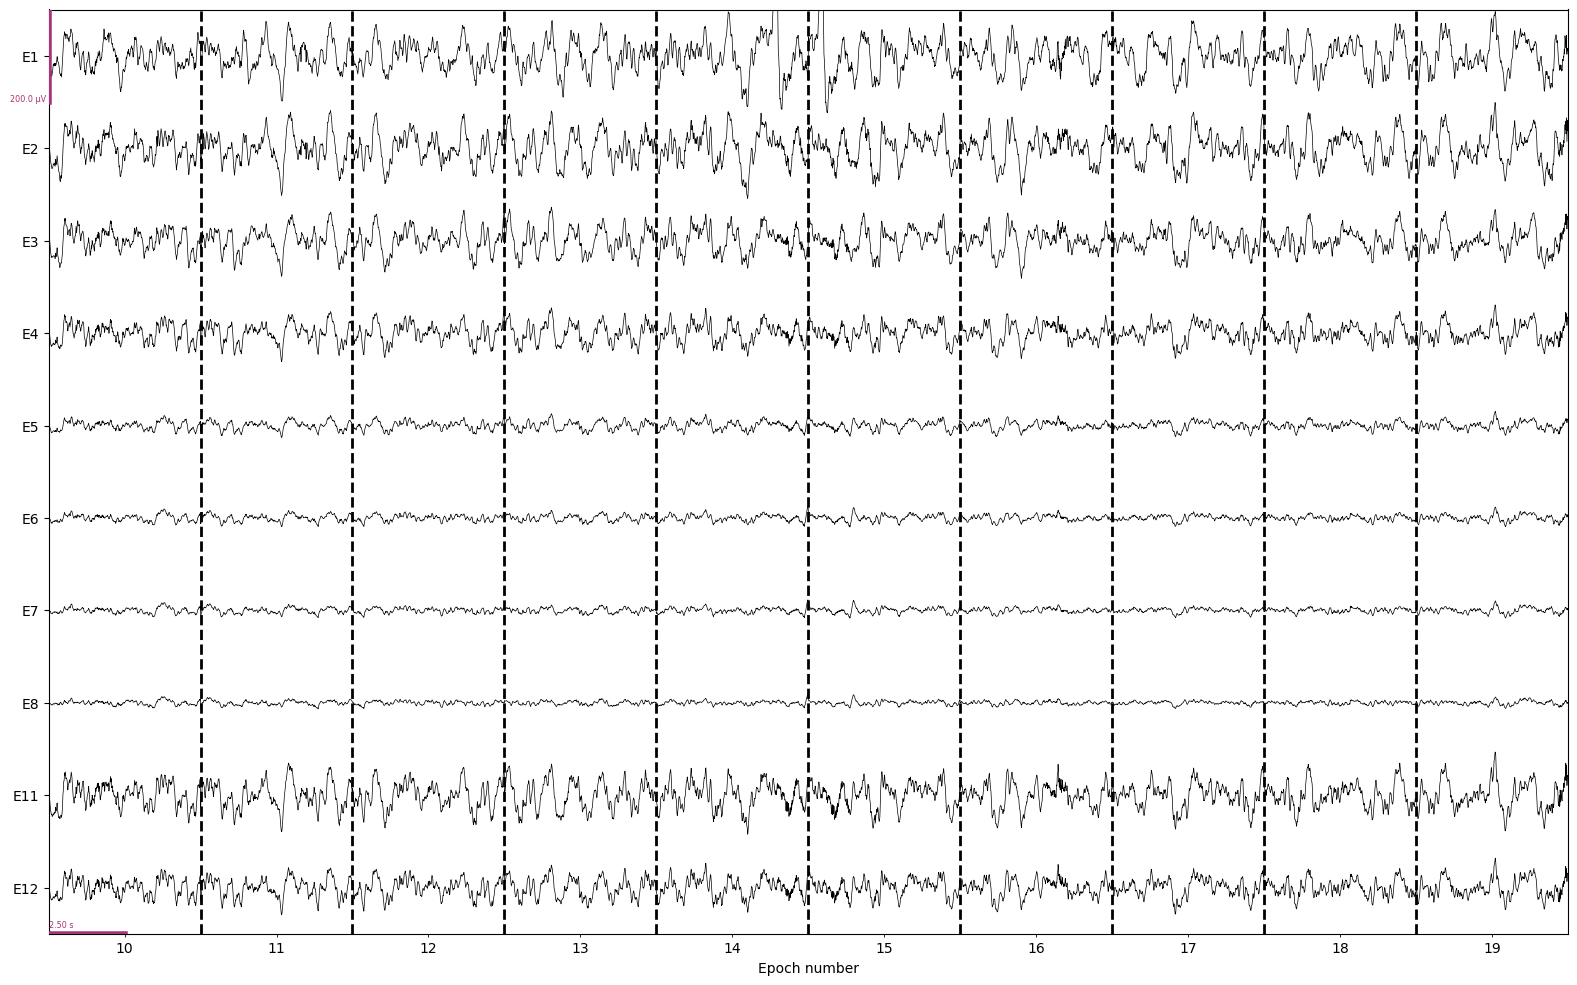

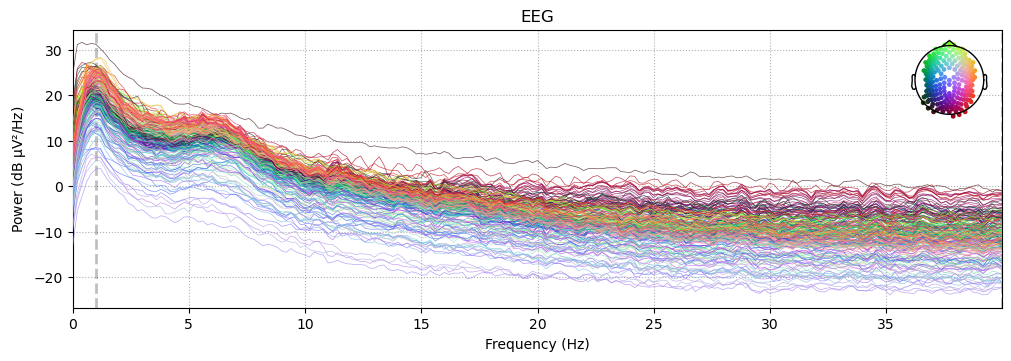

In [51]:
epochs_clean_manual = ica.apply(epochs_good.copy(), exclude=ica.exclude)
print(ica)

epochs_clean_manual.save(
    f"{project_path}/analysis/sub-{subject}_clean_ica-manual-epo.fif", overwrite=True
)
epochs_plot, epochs_plot_psd = plot_epochs(
    epochs_clean_manual, figures_path=figures_path, subject=subject, fmax=40.0
)

In [ ]:
auto_reject_pre_ica = autoreject.AutoReject(
    n_interpolate=[1, 2, 4, 8, 32, 64],
    n_jobs=-1,
    random_state=100,
    thresh_method="bayesian_optimization",
    verbose=False,
    # n_interpolate=np.array([0]),
    # consensus=0.8,
).fit(epochs_clean_manual[:20])
print("fitting finished")
epochs_ar, reject_log = auto_reject_pre_ica.transform(
    epochs_clean_manual, return_log=True
)


# depending of the resampling - different number of epochs are rejected

reject_plot = reject_log.plot("vertical")
report.add_figure(reject_plot, title="Interpolated epochs - AutoReject overview")

# Add the last part to the report
report.add_figure(
    reject_plot, title="Autoreject - Rejected and interpolated epochs after ICA"
)

In [ ]:
epochs_interpolated = epochs_ar.copy().interpolate_bads(exclude=["VREF"])
epochs_interpolated.save(
    f"{project_path}/analysis/sub-{subject}_interpolated-epo.fif", overwrite=True
)

In [ ]:
from specparam.plts.spectra import plot_spectra
from specparam import SpectralGroupModel


fg = SpectralGroupModel(
    peak_width_limits=[1, 6],
    min_peak_height=0.15,
    peak_threshold=2.0,
    max_n_peaks=6,
    verbose=False,
)

In [ ]:
psd = epochs_ar.compute_psd().average()
spectra, freqs = psd.get_data(return_freqs=True)
# Initialize a FOOOFGroup object, with desired settings

# Define the frequency range to fit
freq_range = [2, 40]
fg.fit(freqs, spectra, freq_range)
fg.plot()

In [ ]:
channel_names = epochs_ar.info["ch_names"]
df_channels = pd.DataFrame(
    {"ID": range(len(channel_names)), "ch": channel_names})

df = specparam2pandas(fg)
df = df.merge(df_channels, on="ID")
df["sub_id"] = subject


# Get the current date and time
now = datetime.now()
df["timestamp"] = now
df["nr_intepolated_channels"] = len(epochs_ar.info["bads"])
df["nr_dropped_ica"] = len(ica.exclude)
df["nr_retained_ica"] = ica.n_components_ - len(ica.exclude)
# Create a new list of column names
cols = ["ch"] + [col for col in df.columns if col != "ch"]

# Reorder the columns
df = df[cols]